# Clustering Modeling Exercises


- Clustering with the Iris Dataset

- Using this lesson as a guide, perform clustering on the iris dataset.

    - Choose features other than the ones used in the lesson.
    - Visualize the results of your clustering.
    - Use the elbow method to visually select a good value for k.
    - Repeat the clustering, this time with 3 different features.

In [1]:
from env import host, user, password
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

import viz_kmeans
from sklearn.cluster import KMeans

from pydataset import data

np.set_printoptions(suppress=True)

In [2]:
df = data('iris')

In [3]:
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [4]:
# define independent variables for k-means

X = df[['petal_width', 'sepal_width']]
X.head(3)

,petal_width,sepal_width
1,0.2,3.5
2,0.2,3.0
3,0.2,3.2


In [5]:
# Scale the X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [6]:
#define the thing
kmeans = KMeans(n_clusters=3)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0,
       0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2,
       0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0], dtype=int32)

In [7]:
# make a new column names cluster in iris and X_scaled dataframe

df['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,1
2,4.9,3.0,1.4,0.2,setosa,1
3,4.7,3.2,1.3,0.2,setosa,1
4,4.6,3.1,1.5,0.2,setosa,1
5,5.0,3.6,1.4,0.2,setosa,1


In [8]:
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
15,5.8,4.0,1.2,0.2,setosa,1
55,6.5,2.8,4.6,1.5,versicolor,2
69,6.2,2.2,4.5,1.5,versicolor,2
17,5.4,3.9,1.3,0.4,setosa,1
56,5.7,2.8,4.5,1.3,versicolor,2
48,4.6,3.2,1.4,0.2,setosa,1
91,5.5,2.6,4.4,1.2,versicolor,2
106,7.6,3.0,6.6,2.1,virginica,0
93,5.8,2.6,4.0,1.2,versicolor,2
132,7.9,3.8,6.4,2.0,virginica,0


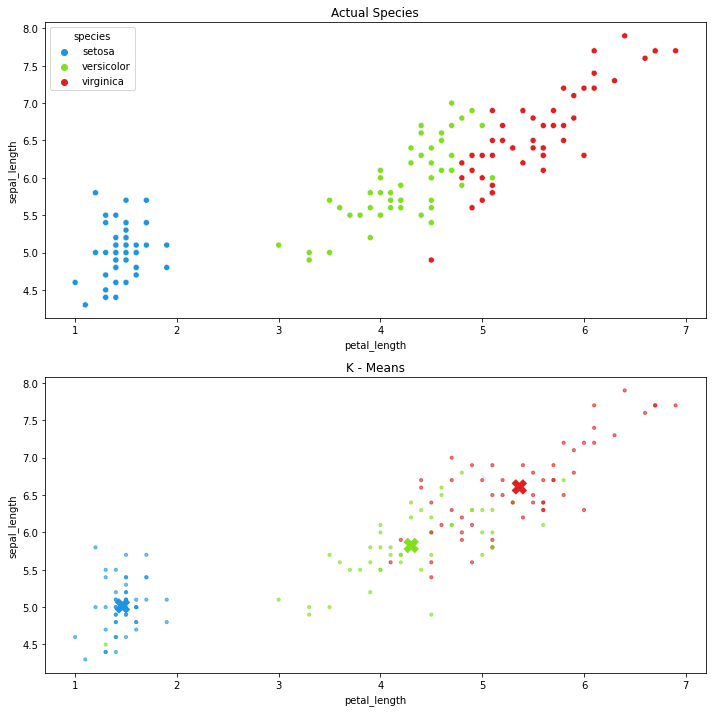

In [9]:
# Visualize the scatter plot for Actual vs predicted (K-Means)
viz_kmeans.viz_iris(df, kmeans)

In [10]:
# Cluster Centers aka centroids. The output is scaled!!

kmeans.cluster_centers_

array([[ 0.9710555 ,  0.07690277],
       [-1.25634413,  0.90625492],
       [ 0.1941248 , -1.03317533]])

In [11]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,petal_width,sepal_width
0,0.971055,0.076903
1,-1.256344,0.906255
2,0.194125,-1.033175


In [12]:
# Centriods for unscaled data?

centroids = df.groupby('cluster')['petal_width', 'sepal_width'].mean()
centroids

,petal_width,sepal_width
cluster,,
0,1.937037,3.090741
1,0.244898,3.451020
2,1.346809,2.608511


In [13]:
# Another way
# use inverse scaler to get cluster centers in original unscaled units
scaler.inverse_transform(kmeans.cluster_centers_)

array([[1.93703704, 3.09074074],
       [0.24489796, 3.45102041],
       [1.34680851, 2.60851064]])

In [14]:
# Labels (same as from predict)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0,
       0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2,
       0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0], dtype=int32)

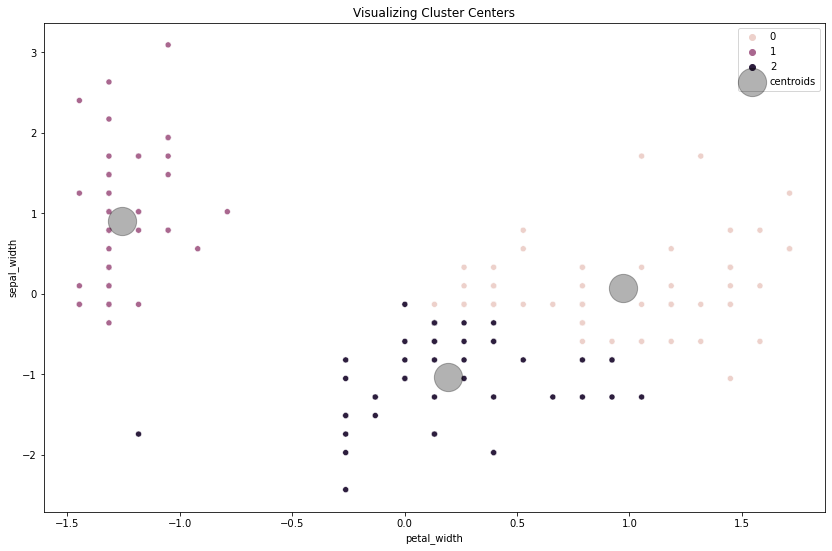

In [15]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'petal_width', y = 'sepal_width', data = X_scaled, hue = 'cluster')


# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'petal_width', y = 'sepal_width', ax = plt.gca(), color ='k', alpha = 0.3, s = 800, marker = 'o', label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

In [16]:
df['cluster'] = 'cluster_' + df.cluster.astype(str)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,cluster_1
2,4.9,3.0,1.4,0.2,setosa,cluster_1
3,4.7,3.2,1.3,0.2,setosa,cluster_1
4,4.6,3.1,1.5,0.2,setosa,cluster_1
5,5.0,3.6,1.4,0.2,setosa,cluster_1


In [17]:
X_scaled['cluster'] = 'cluster_' + X_scaled.cluster.astype(str)


<Figure size 1008x648 with 0 Axes>

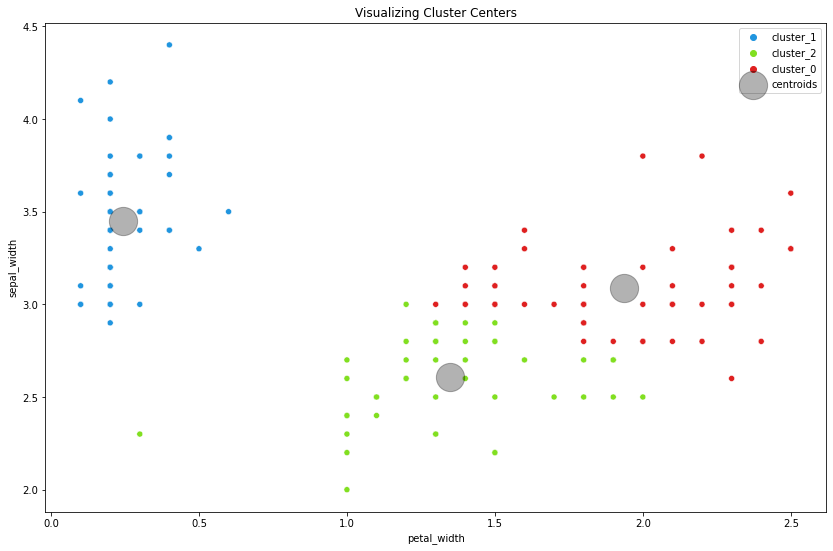

In [18]:
# lets visualize the clusters along with the centers on unscaled data
plt.figure(figsize=(14, 9))
plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'petal_width', y = 'sepal_width', data = df, hue = 'cluster')


# plot cluster centers (centroids)
centroids.plot.scatter(x = 'petal_width', y = 'sepal_width', ax = plt.gca(), color ='k', alpha = 0.3, s = 800, marker = 'o', label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();


In [19]:
X = df[['petal_width', 'sepal_width']]
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

<AxesSubplot:xlabel='petal_width', ylabel='sepal_width'>

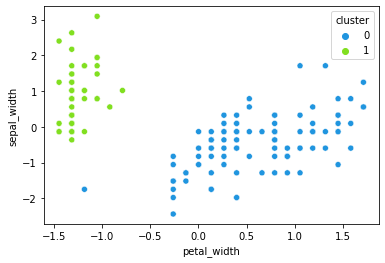

In [20]:
# lets look at two clusters (i.e k = 2)

kmeans = KMeans(n_clusters = 2)
kmeans.fit(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)
sns.scatterplot(x='petal_width', y='sepal_width', data = X_scaled, hue = 'cluster')

In [21]:
kmeans.inertia_

125.36847212365322

In [22]:
X = df[['petal_width', 'sepal_width']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

k =2 

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

125.36847212365322

In [23]:
k = 3

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

79.23480116760695

In [24]:
k = 4

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

59.20714767894183

In [25]:
k = 5

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

43.14059052309497

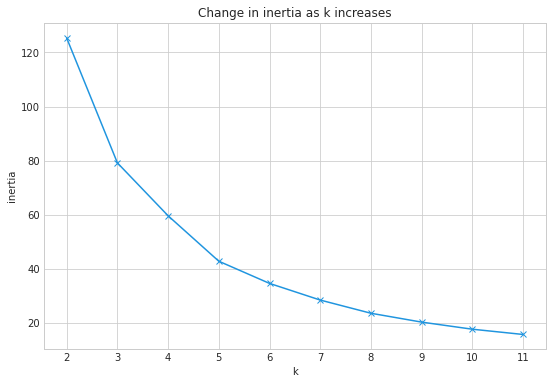

In [26]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

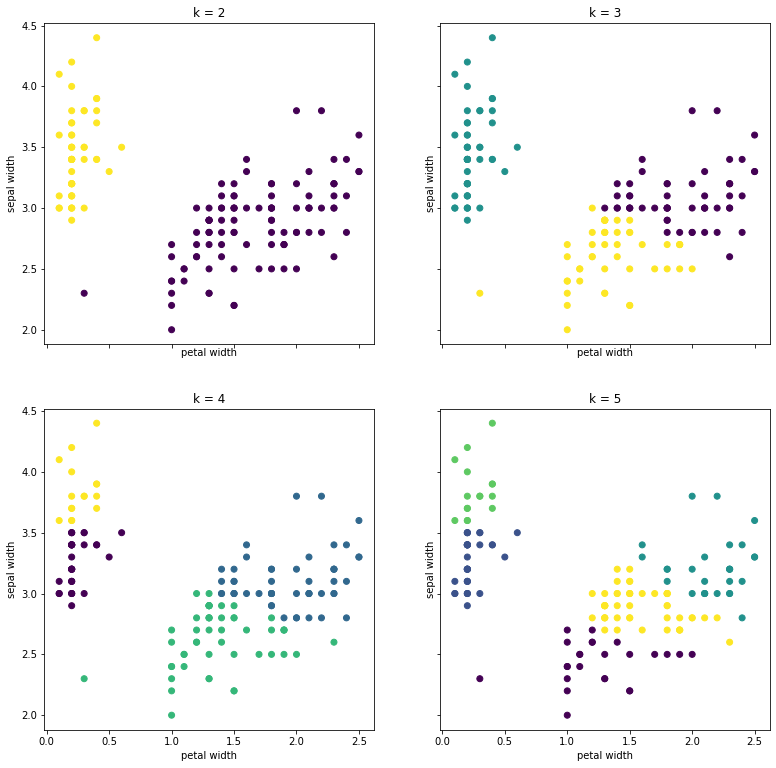

In [27]:
# What value of k is appropriate?


fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X.petal_width, X.sepal_width, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='petal width', ylabel='sepal width')

-------

<h4> Repeat the above process with three features </h4>

-----

In [28]:
# define independent variables for k-means

X = df[['petal_width', 'sepal_width', 'sepal_length']]
X.head(3)

,petal_width,sepal_width,sepal_length
1,0.2,3.5,5.1
2,0.2,3.0,4.9
3,0.2,3.2,4.7


In [29]:
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [30]:
X_scaled.head()

,petal_width,sepal_width,sepal_length
1,-1.315444,1.019004,-0.900681
2,-1.315444,-0.131979,-1.143017
3,-1.315444,0.328414,-1.385353
4,-1.315444,0.098217,-1.506521
5,-1.315444,1.249201,-1.021849


In [31]:
#define the thing
kmeans = KMeans(n_clusters=3)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [32]:
# make a new column names cluster in iris and X_scaled dataframe

df['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,1
2,4.9,3.0,1.4,0.2,setosa,1
3,4.7,3.2,1.3,0.2,setosa,1
4,4.6,3.1,1.5,0.2,setosa,1
5,5.0,3.6,1.4,0.2,setosa,1


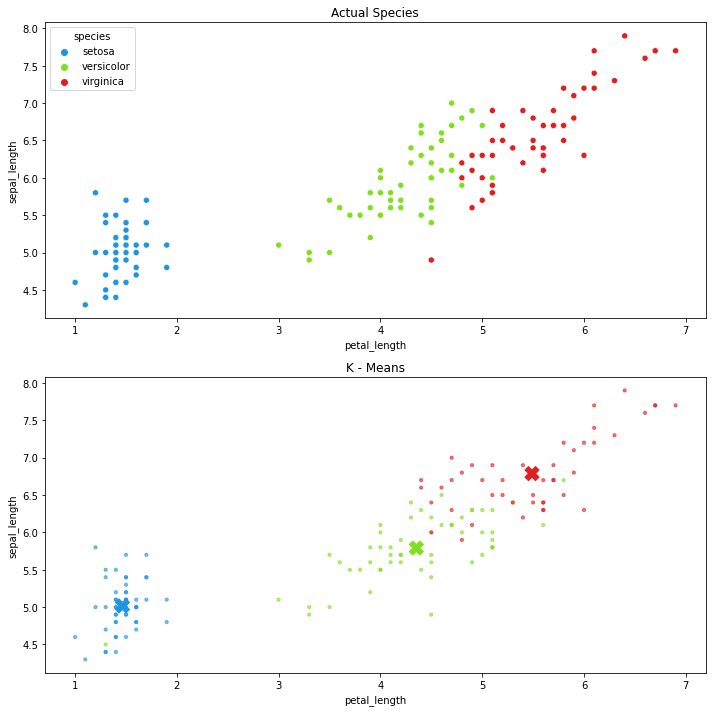

In [33]:
# Visualize the scatter plot for Actual vs predicted (K-Means)
viz_kmeans.viz_iris(df, kmeans)

In [34]:
# Cluster Centers aka centroids. The output is scaled!!

kmeans.cluster_centers_

array([[ 1.00528835,  0.12824295,  1.14336812],
       [-1.25634413,  0.90625492, -1.00206653],
       [ 0.27850179, -0.91464848, -0.06352134]])

In [35]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,petal_width,sepal_width,sepal_length
0,1.005288,0.128243,1.143368
1,-1.256344,0.906255,-1.002067
2,0.278502,-0.914648,-0.063521


In [36]:
# Centriods for unscaled data?

centroids = df.groupby('cluster')['petal_width', 'sepal_width', 'sepal_length'].mean()
centroids

,petal_width,sepal_width,sepal_length
cluster,,,
0,1.963043,3.113043,6.786957
1,0.244898,3.451020,5.016327
2,1.410909,2.660000,5.790909


In [37]:
# Another way
# use inverse scaler to get cluster centers in original unscaled units
scaler.inverse_transform(kmeans.cluster_centers_)

array([[1.96304348, 3.11304348, 6.78695652],
       [0.24489796, 3.45102041, 5.01632653],
       [1.41090909, 2.66      , 5.79090909]])

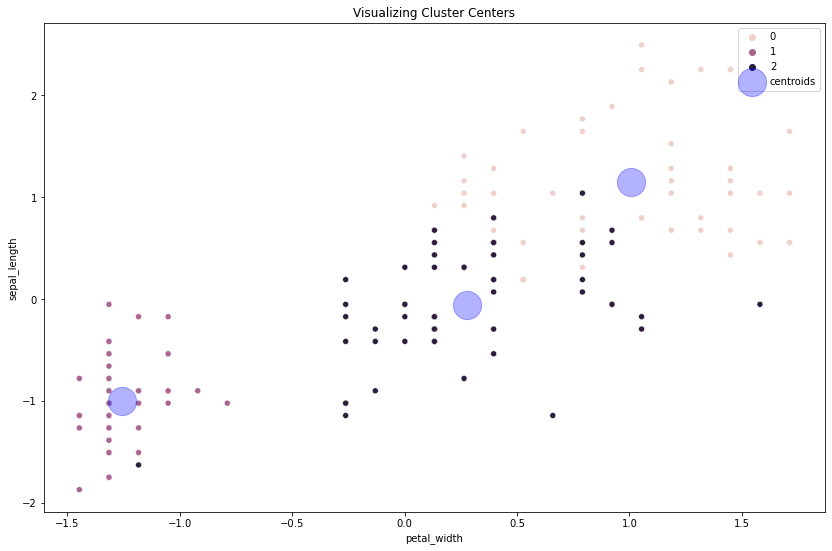

In [38]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'petal_width', y = 'sepal_length', data = X_scaled, hue = 'cluster')


# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'petal_width', y = 'sepal_length', ax = plt.gca(), color ='b', alpha = 0.3, s = 800, marker = 'o', label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

In [39]:
df['cluster'] = 'cluster_' + df.cluster.astype(str)
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,cluster_1
2,4.9,3.0,1.4,0.2,setosa,cluster_1
3,4.7,3.2,1.3,0.2,setosa,cluster_1
4,4.6,3.1,1.5,0.2,setosa,cluster_1
5,5.0,3.6,1.4,0.2,setosa,cluster_1


In [40]:
X_scaled['cluster'] = 'cluster_' + X_scaled.cluster.astype(str)


<Figure size 1008x648 with 0 Axes>

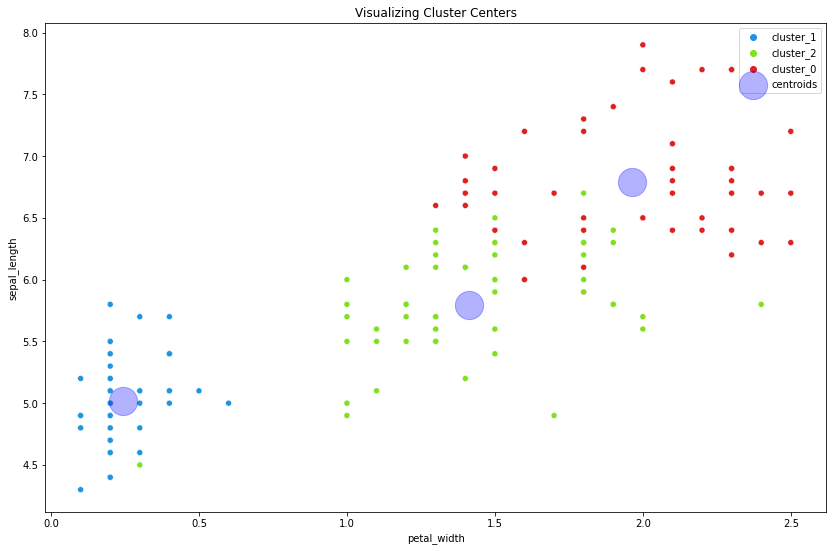

In [41]:
# lets visualize the clusters along with the centers on unscaled data
plt.figure(figsize=(14, 9))
plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'petal_width', y = 'sepal_length', data = df, hue = 'cluster')


# plot cluster centers (centroids)
centroids.plot.scatter(x = 'petal_width', y = 'sepal_length', ax = plt.gca(), color ='b', alpha = 0.3, s = 800, marker = 'o', label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();


In [42]:
X = df[['petal_width', 'sepal_width', 'sepal_length']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

k =2 

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

200.0860982461143

In [43]:
k = 3

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

125.33242621910301

In [44]:
k = 4

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

101.50415089567718

In [45]:
k = 5

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

81.06415969109138

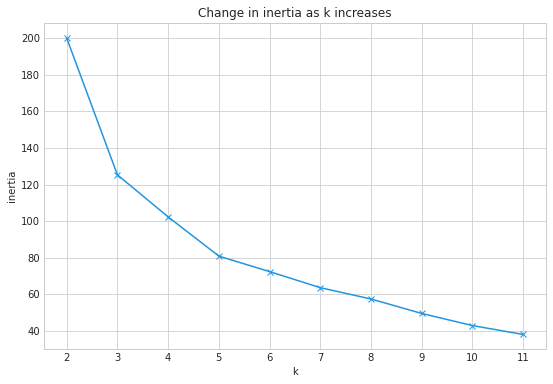

In [46]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

---------
<h4>Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!</h4>

-----

In [47]:
# Create helper function to get the necessary connection url.
def get_connection(db, user=user, host=host, password=password):
    '''
    This function uses my info from my env file to
    create a connection url to access the Codeup db.
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

    
    

# Use the above helper function and a sql query in a single function.
def new_mall_data():
    '''
    This function reads data from the Codeup db into a df.
    '''
    mall_customers_sql = "SELECT * \
                  FROM customers;;" \
    
    
    return pd.read_sql(mall_customers_sql, get_connection('mall_customers'))

In [48]:
df = new_mall_data()

In [49]:
df.set_index('customer_id', inplace = True)

In [50]:
df.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [51]:
df.rename(columns = {'gender': 'is_male'}, inplace = True)

In [52]:
df.is_male.replace({'Male': 1, 'Female': 0}, inplace = True)

In [53]:
df.head()

,is_male,age,annual_income,spending_score
customer_id,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40


In [54]:
df.columns = ['is_male', 'age', 'annual_income', 'spending_score']

df.head()

,is_male,age,annual_income,spending_score
customer_id,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40


In [55]:
# define independent variables for k-means

X = df[['age', 'annual_income']]
X.head(3)

,age,annual_income
customer_id,,
1,19,15
2,21,15
3,20,16


In [56]:
# Scale the X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [57]:
X_scaled.head()

,age,annual_income
1,-1.424569,-1.738999
2,-1.281035,-1.738999
3,-1.352802,-1.700830
4,-1.137502,-1.700830
5,-0.563369,-1.662660


In [58]:
#define the thing
kmeans = KMeans(n_clusters=3)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1,
       1, 2, 2, 1, 2, 0, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 1, 0, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [59]:
# make a new column names cluster in iris and X_scaled dataframe

df['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

df.head()

,is_male,age,annual_income,spending_score,cluster
customer_id,,,,,
1,1,19,15,39,1
2,1,21,15,81,1
3,0,20,16,6,1
4,0,23,16,77,1
5,0,31,17,40,1


In [60]:
# Cluster Centers aka centroids. The output is scaled!!

kmeans.cluster_centers_

array([[-0.27913465,  0.96851913],
       [-0.87474334, -0.83093616],
       [ 1.2169084 , -0.35628084]])

In [61]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,age,annual_income
0,-0.279135,0.968519
1,-0.874743,-0.830936
2,1.216908,-0.356281


In [62]:
# Centriods for unscaled data?

centroids = df.groupby('cluster')['age', 'annual_income'].mean()
centroids

,age,annual_income
cluster,,
0,34.960526,85.934211
1,26.661290,38.790323
2,55.806452,51.225806


In [63]:
# Another way
# use inverse scaler to get cluster centers in original unscaled units
scaler.inverse_transform(kmeans.cluster_centers_)

array([[34.96052632, 85.93421053],
       [26.66129032, 38.79032258],
       [55.80645161, 51.22580645]])

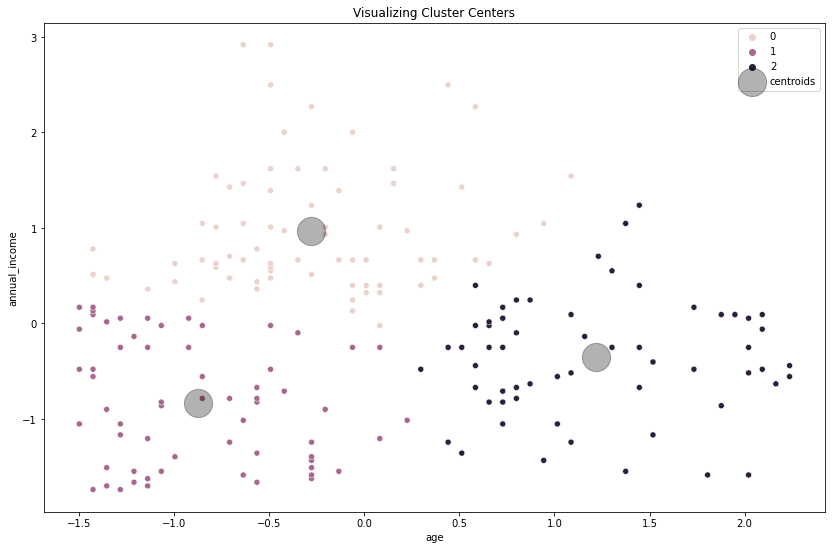

In [64]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'age', y = 'annual_income', data = X_scaled, hue = 'cluster')


# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'age', y = 'annual_income', ax = plt.gca(), color ='k', alpha = 0.3, s = 800, marker = 'o', label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

In [65]:
X_scaled['cluster'] = 'cluster_' + X_scaled.cluster.astype(str)

<Figure size 1008x648 with 0 Axes>

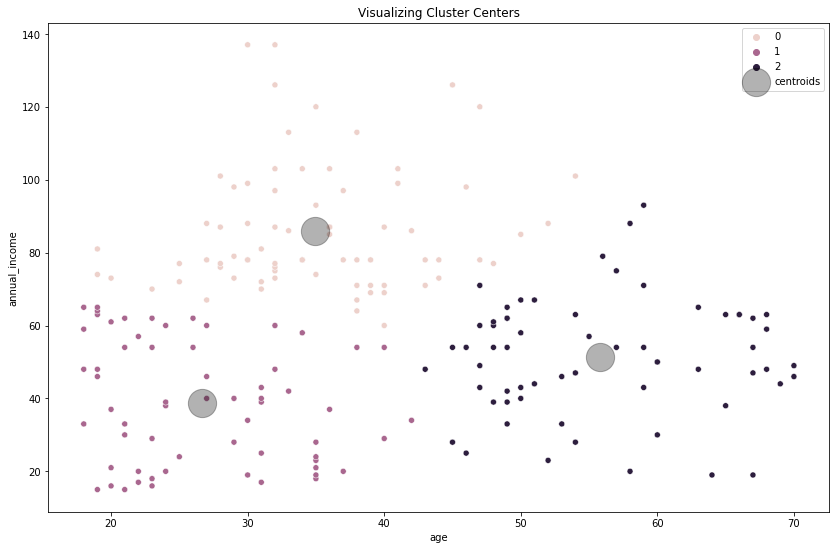

In [78]:
# lets visualize the clusters along with the centers on unscaled data
plt.figure(figsize=(14, 9))
plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'age', y = 'annual_income', data = df, hue = 'cluster')


# plot cluster centers (centroids)
centroids.plot.scatter(x = 'age', y = 'annual_income', ax = plt.gca(), color ='k', alpha = 0.3, s = 800, marker = 'o', label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

In [67]:
kmeans.inertia_

132.8553042122192

In [69]:
X = df[['age', 'annual_income']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

k =2 

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

250.58811570754705

In [70]:
k = 3

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

132.8553042122192

In [71]:
k = 4

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

103.16084070415799

In [72]:
k = 5

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

81.33494168772981

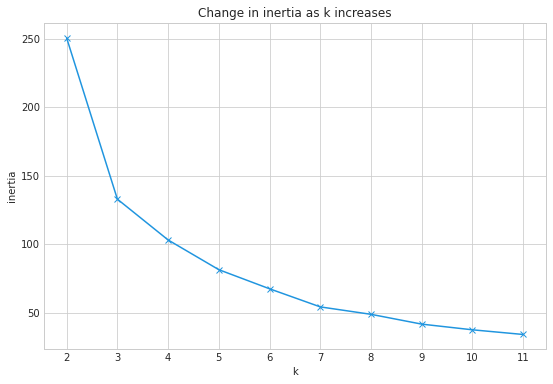

In [73]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

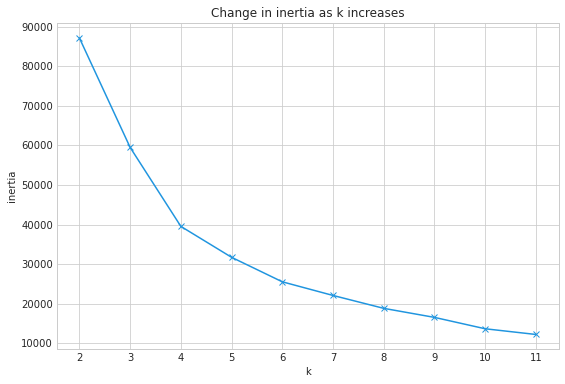

In [76]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

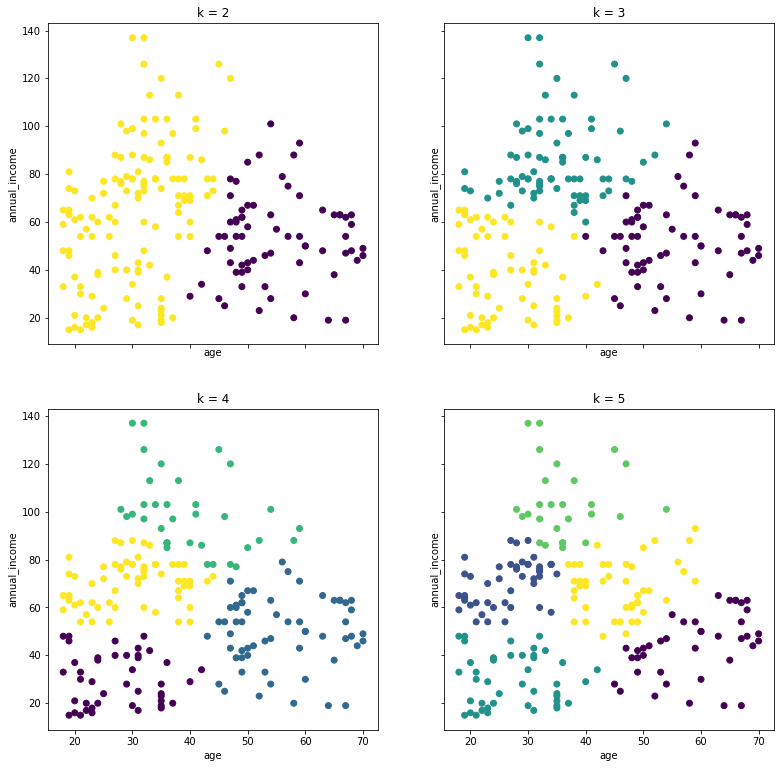

In [75]:
# What value of k is appropriate?


fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X.age, X.annual_income, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='age', ylabel='annual_income')

<h5>How does scaling impact the results of clustering?

Compare k-means clustering results on scaled and unscaled data. You can show how the resulting clusters differ either with descriptive statistics or visually.</h5>